In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff

from sklearn.model_selection import cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [4]:
year1 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/1year.arff')
year2 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/2year.arff')
year3 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/3year.arff')
year4 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/4year.arff')
year5 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/5year.arff')


year1DF = pd.DataFrame(year1[0])
year2DF = pd.DataFrame(year2[0])
year3DF = pd.DataFrame(year3[0])
year4DF = pd.DataFrame(year4[0])
year5DF = pd.DataFrame(year5[0])


In [5]:
year1DF['year'] = 1
year2DF['year'] = 2
year3DF['year'] = 3
year4DF['year'] = 4
year5DF['year'] = 5

In [14]:
frames = [year1DF, year2DF, year3DF, year4DF, year5DF]
data = pd.concat(frames)
data.reset_index(drop=True,inplace=True)
for i in frames:
    print(i.shape)
print(data.shape)

(7027, 66)
(10173, 66)
(10503, 66)
(9792, 66)
(5910, 66)
(43405, 66)


In [17]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,2.939753
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


In [15]:
missingData = []
for i in data:
    if data[i].isnull().sum() > 0:
        print(i,':',data[i].isnull().sum(),'missing')
        print(i,':',data[i].isnull().sum() / len(data),'%')
        missingData.append(i)

Attr1 : 8 missing
Attr1 : 0.00018431056329915908 %
Attr2 : 8 missing
Attr2 : 0.00018431056329915908 %
Attr3 : 8 missing
Attr3 : 0.00018431056329915908 %
Attr4 : 134 missing
Attr4 : 0.0030872019352609146 %
Attr5 : 89 missing
Attr5 : 0.0020504550167031446 %
Attr6 : 8 missing
Attr6 : 0.00018431056329915908 %
Attr7 : 8 missing
Attr7 : 0.00018431056329915908 %
Attr8 : 94 missing
Attr8 : 0.0021656491187651192 %
Attr9 : 9 missing
Attr9 : 0.00020734938371155397 %
Attr10 : 8 missing
Attr10 : 0.00018431056329915908 %
Attr11 : 44 missing
Attr11 : 0.001013708098145375 %
Attr12 : 134 missing
Attr12 : 0.0030872019352609146 %
Attr13 : 127 missing
Attr13 : 0.0029259301923741502 %
Attr14 : 8 missing
Attr14 : 0.00018431056329915908 %
Attr15 : 36 missing
Attr15 : 0.0008293975348462159 %
Attr16 : 95 missing
Attr16 : 0.002188687939177514 %
Attr17 : 94 missing
Attr17 : 0.0021656491187651192 %
Attr18 : 8 missing
Attr18 : 0.00018431056329915908 %
Attr19 : 128 missing
Attr19 : 0.0029489690127865453 %
Attr20 : 

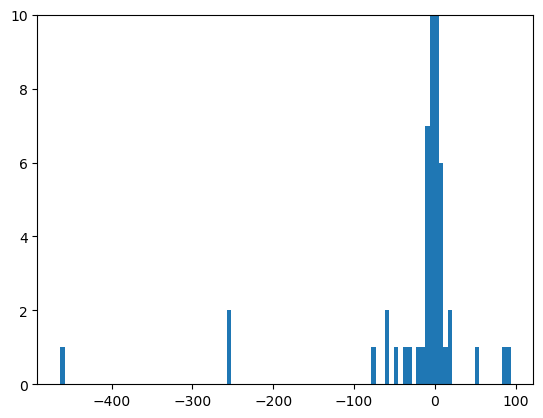

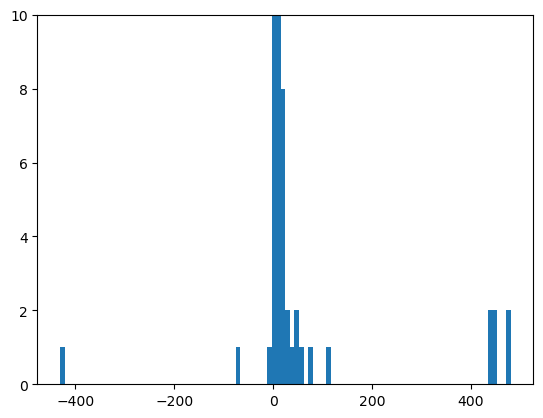

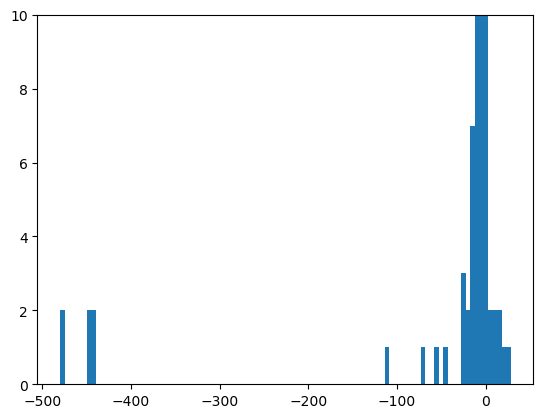

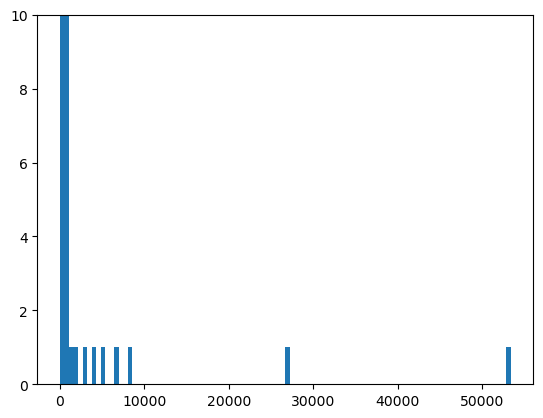

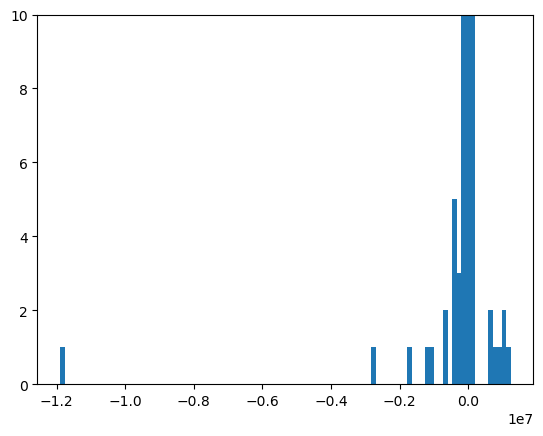

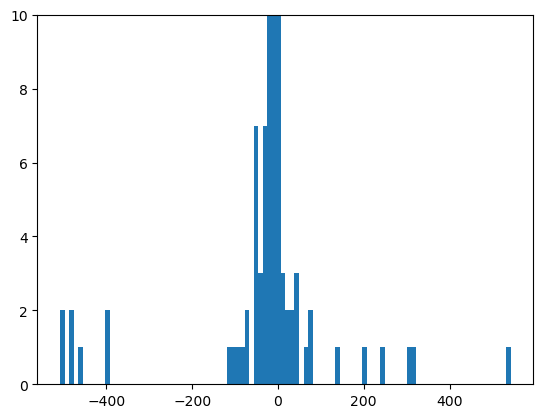

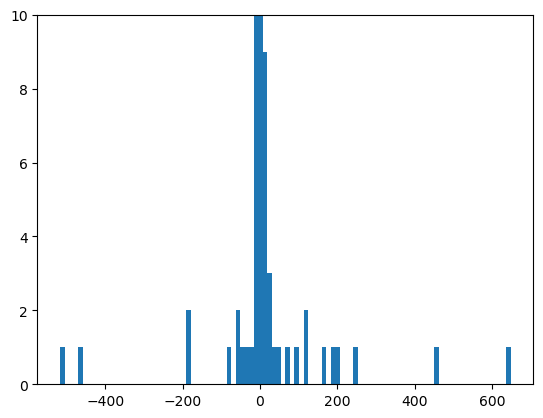

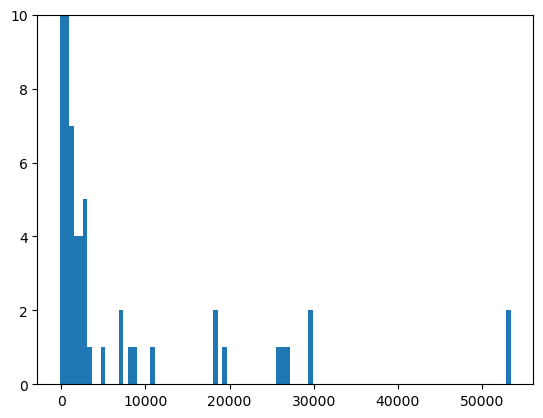

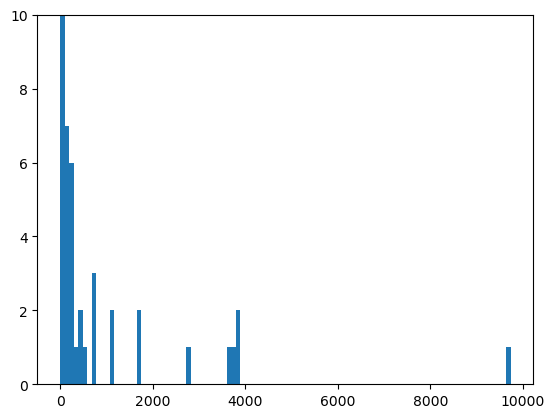

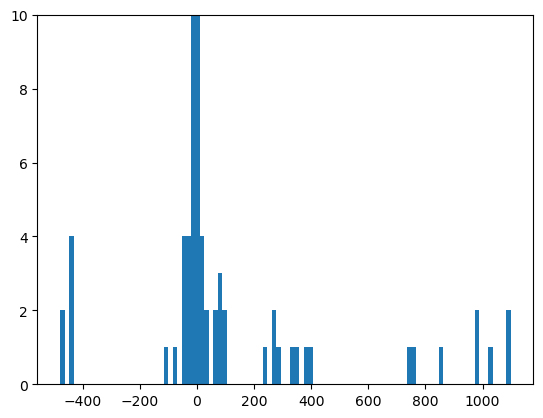

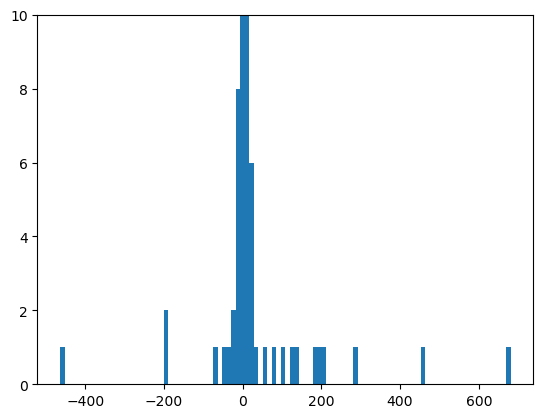

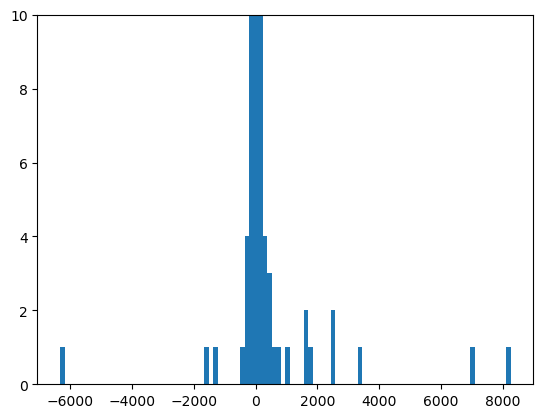

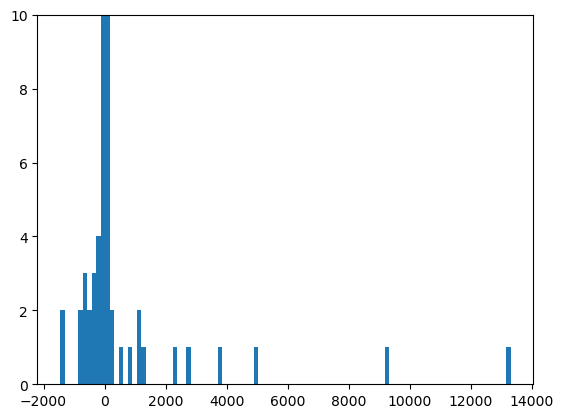

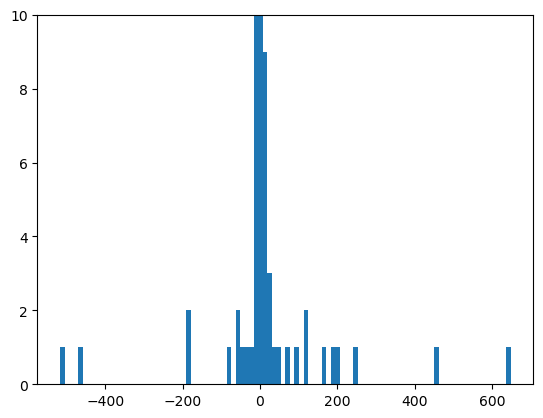

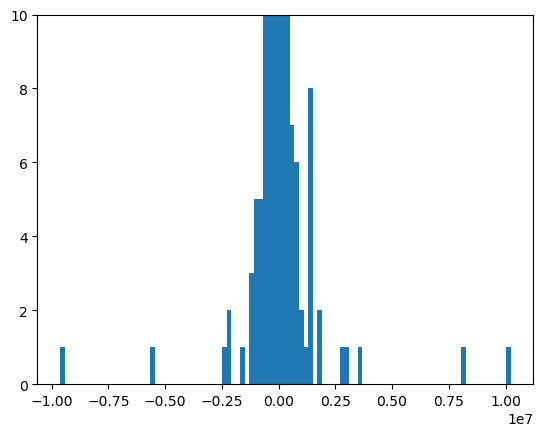

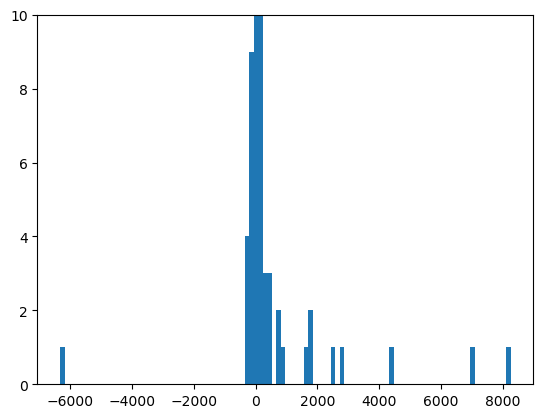

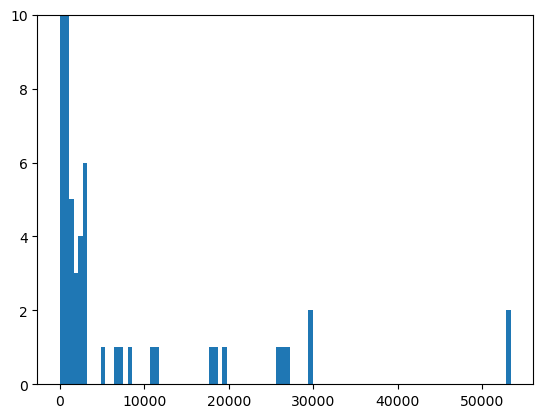

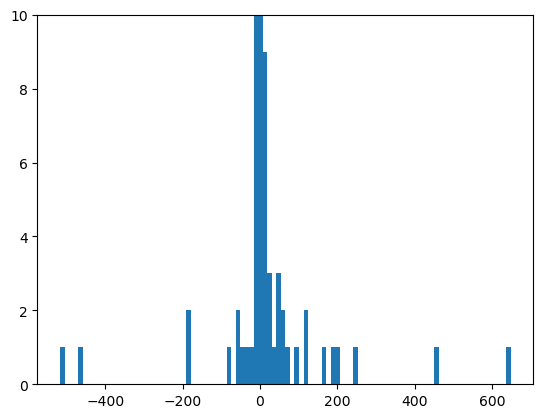

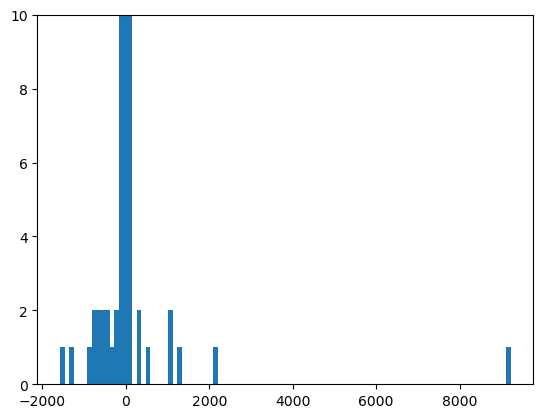

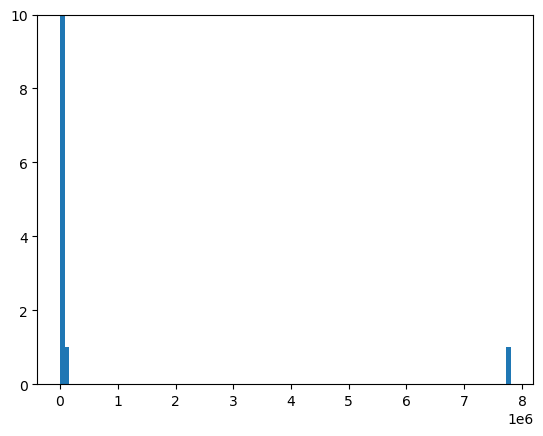

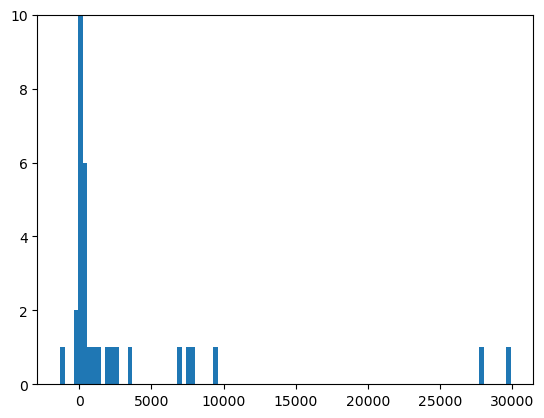

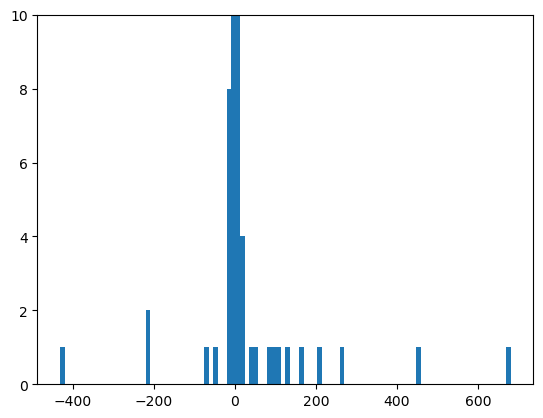

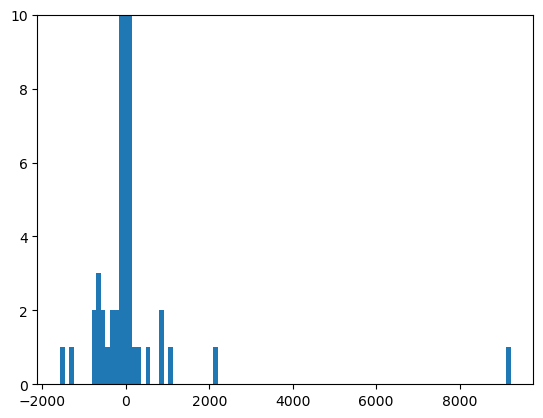

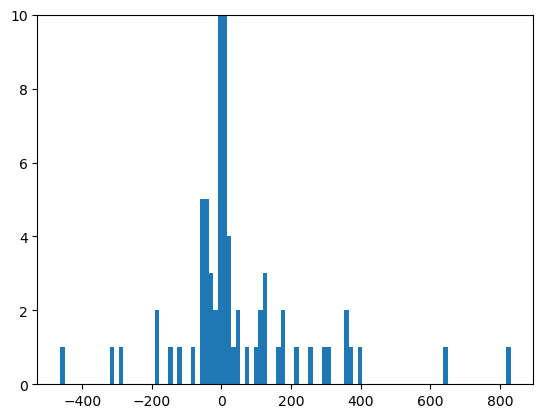

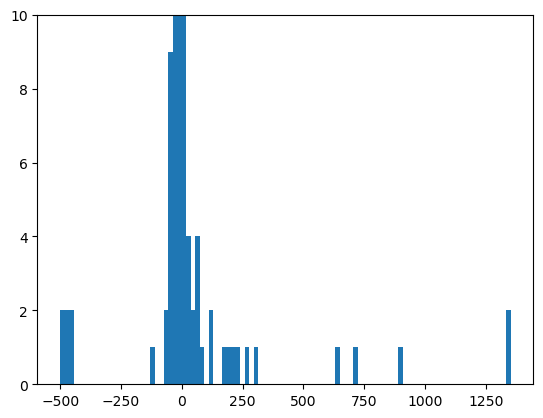

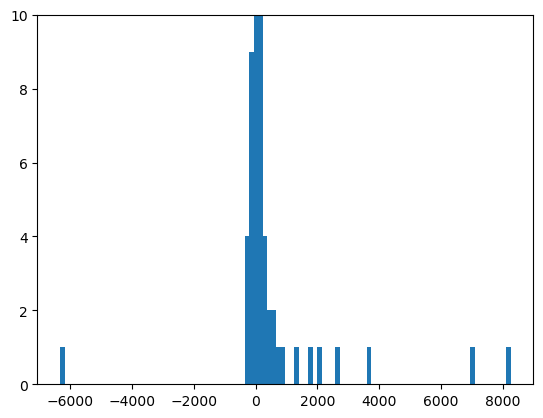

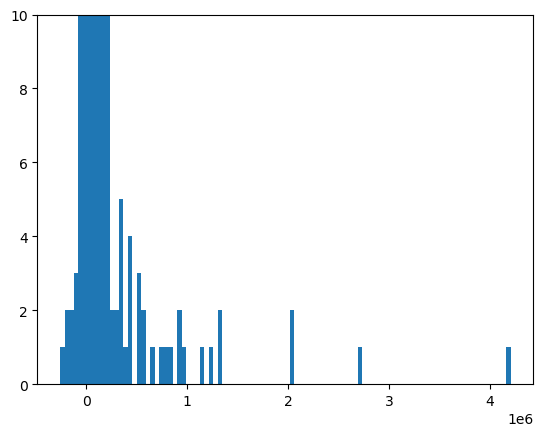

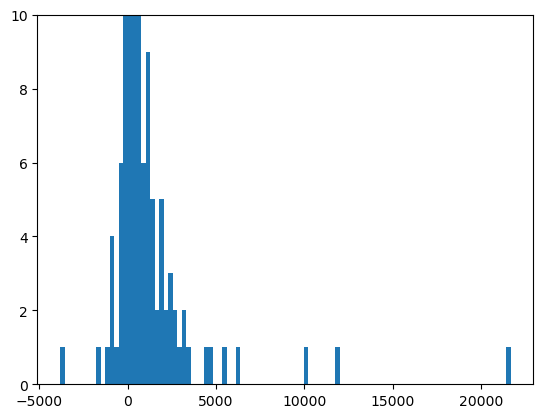

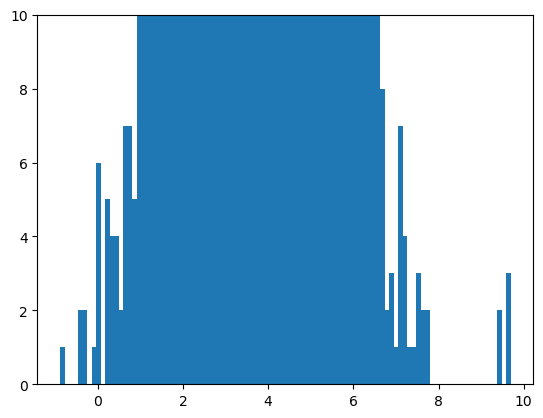

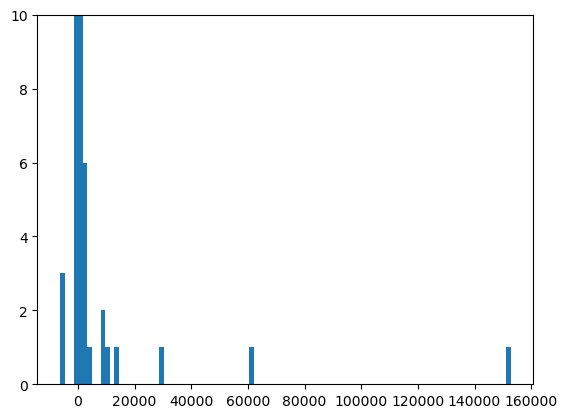

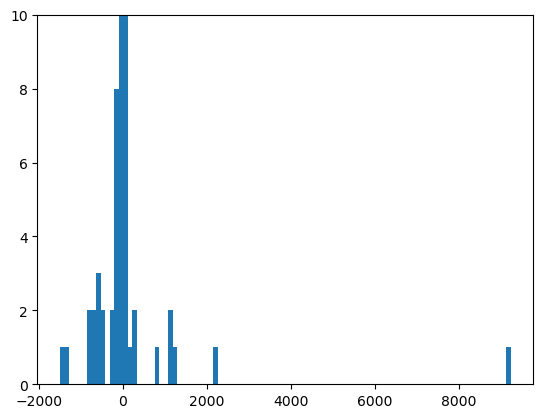

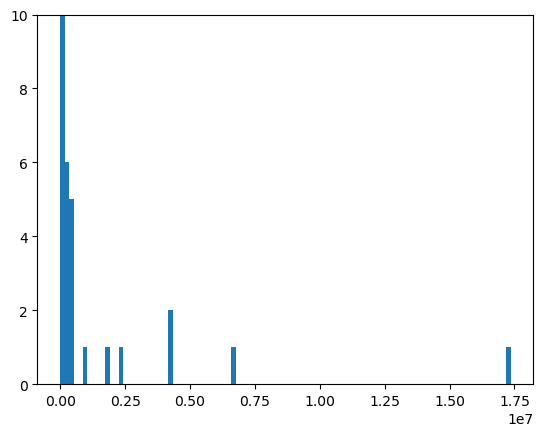

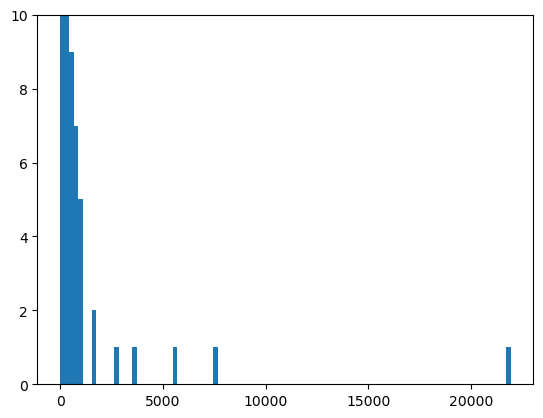

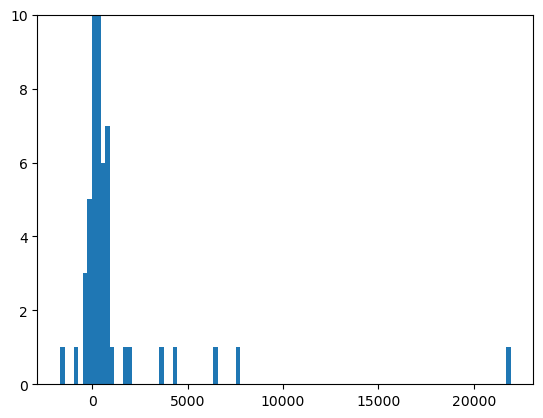

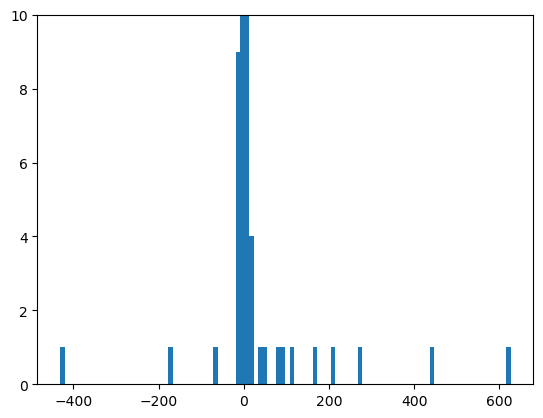

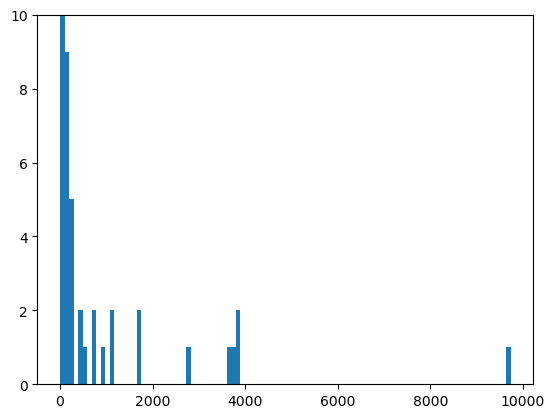

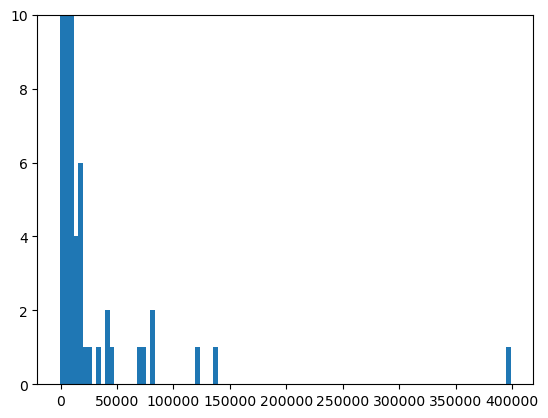

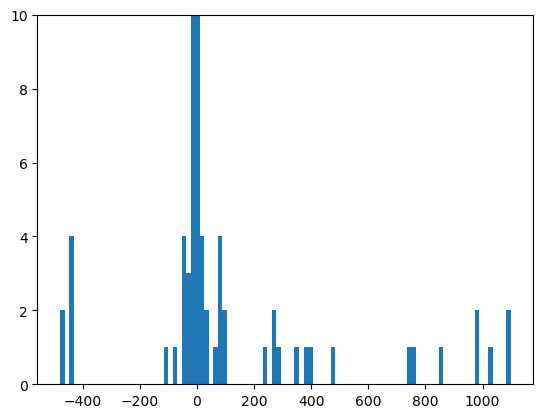

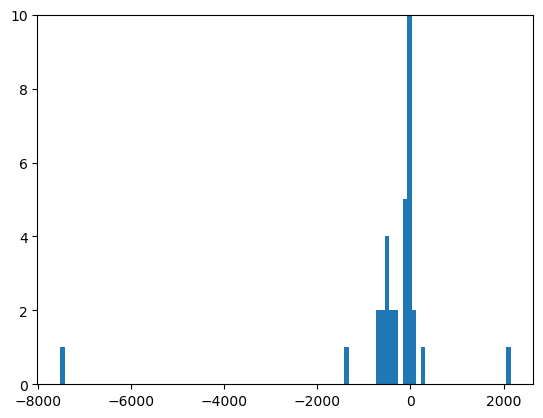

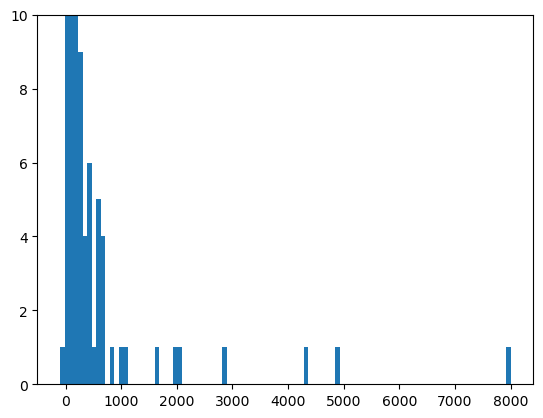

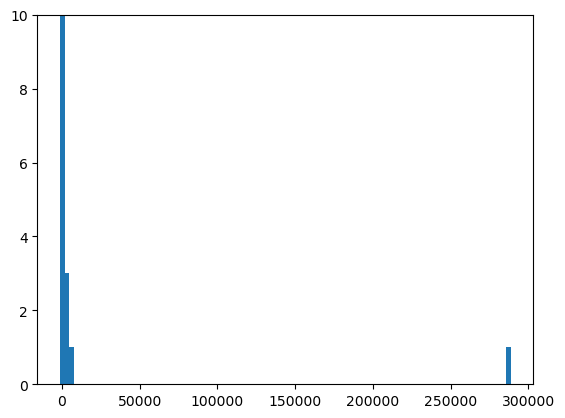

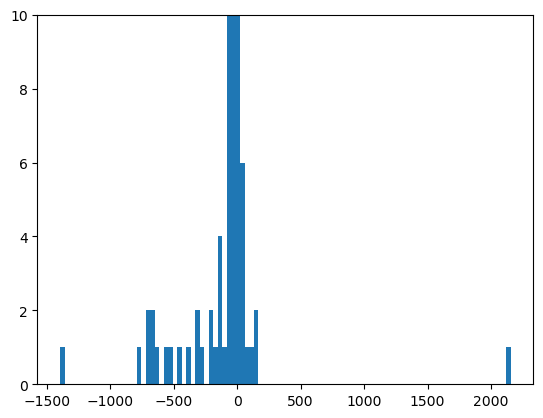

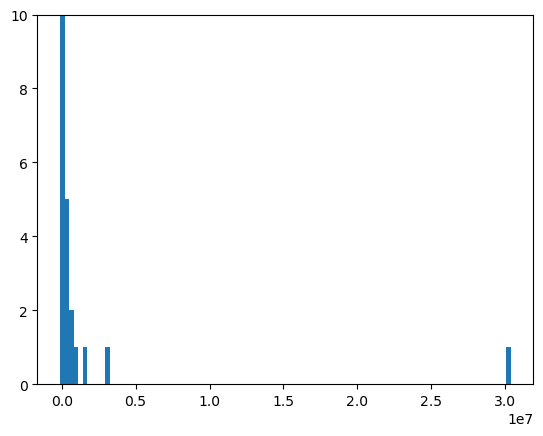

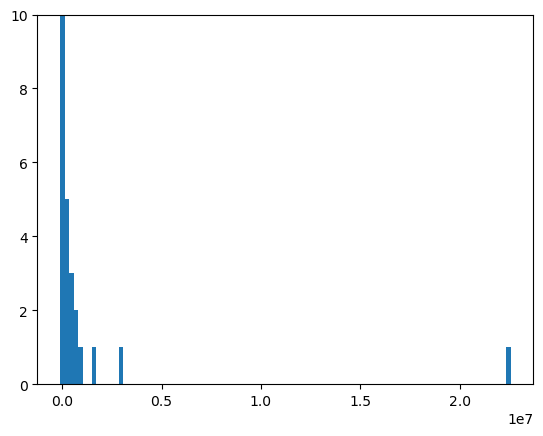

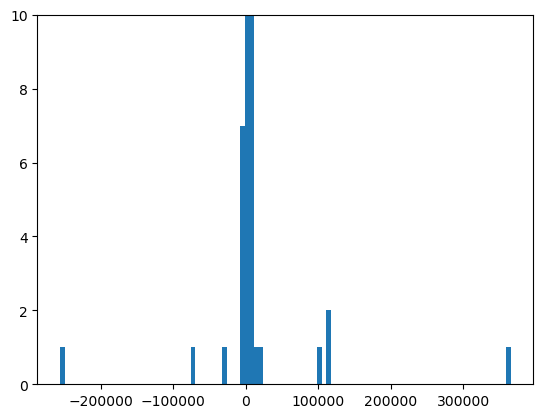

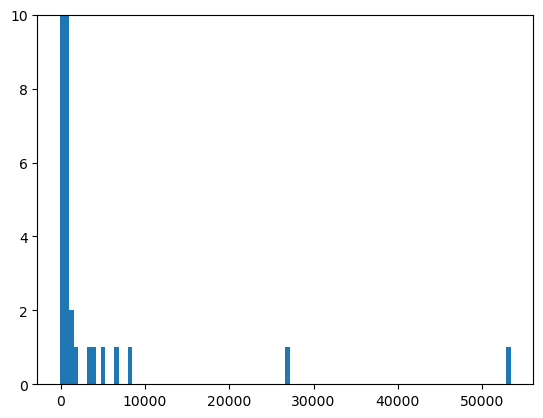

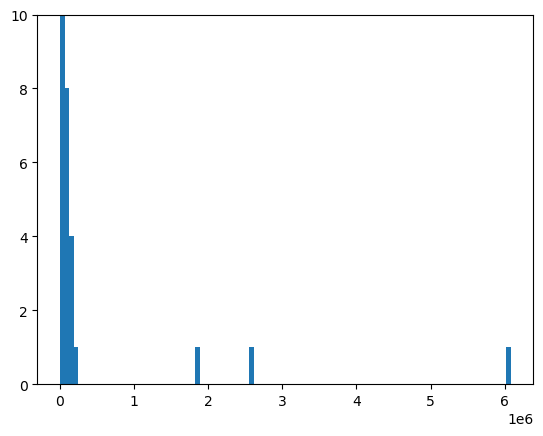

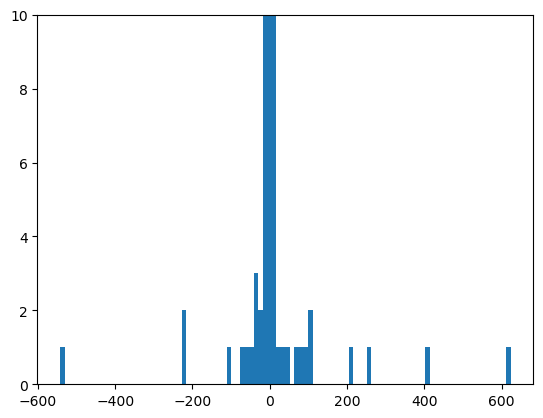

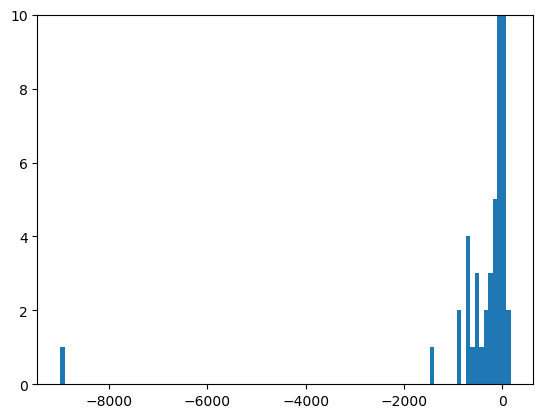

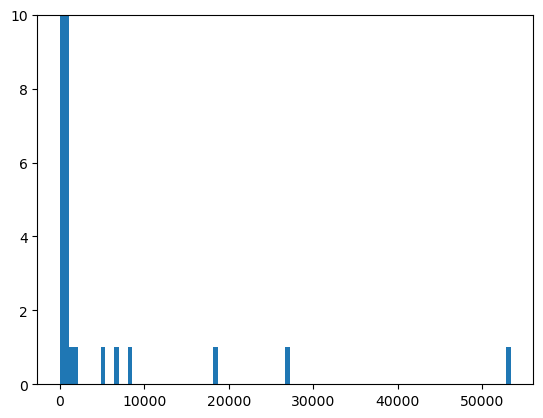

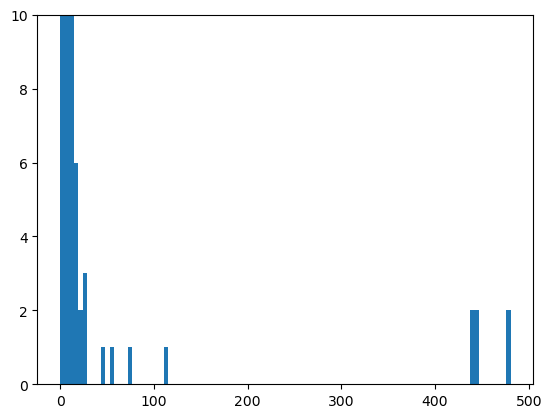

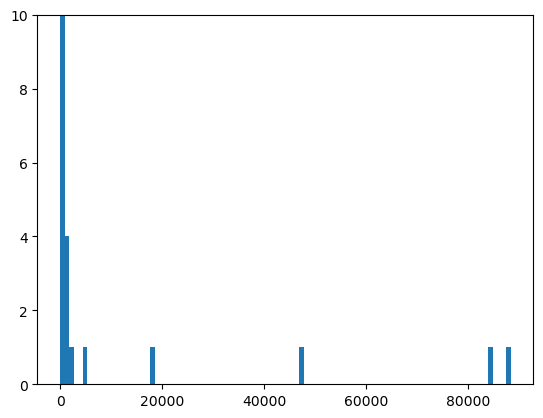

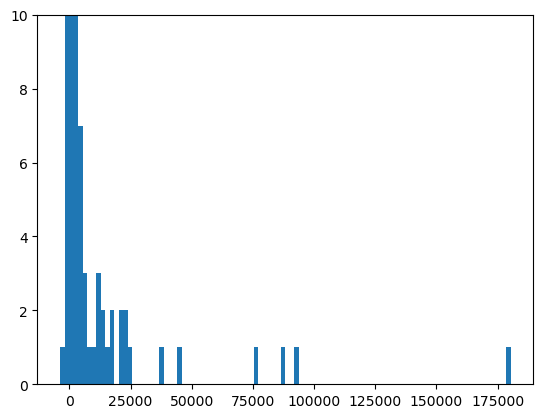

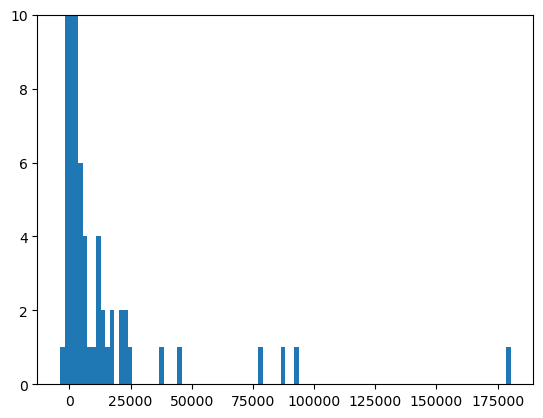

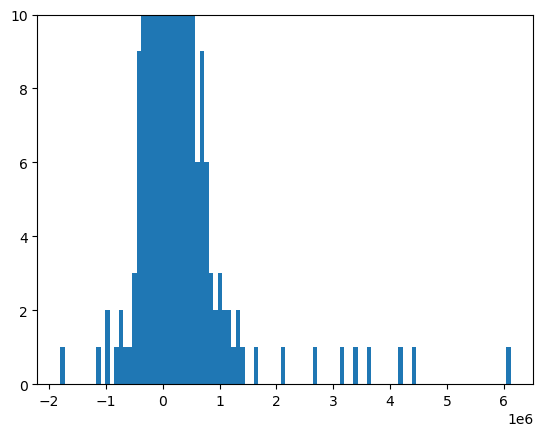

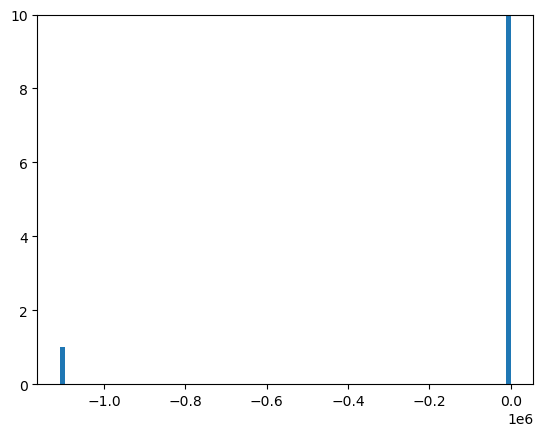

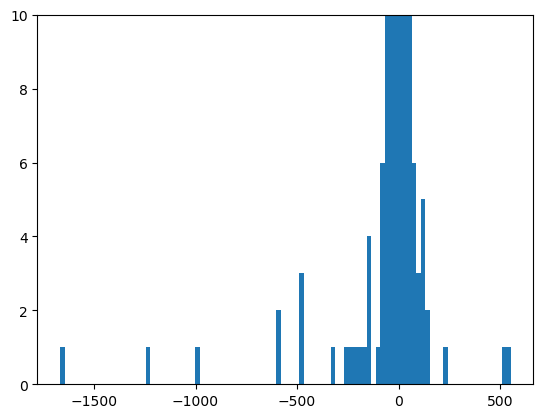

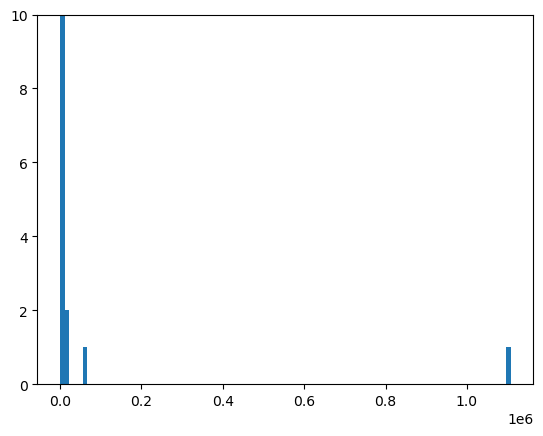

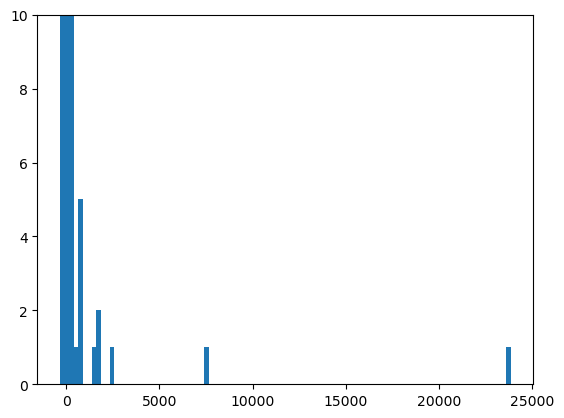

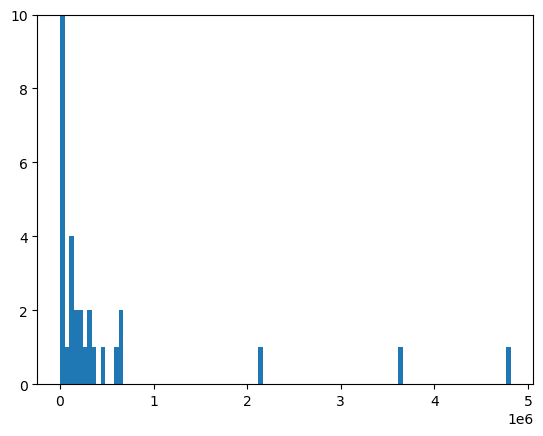

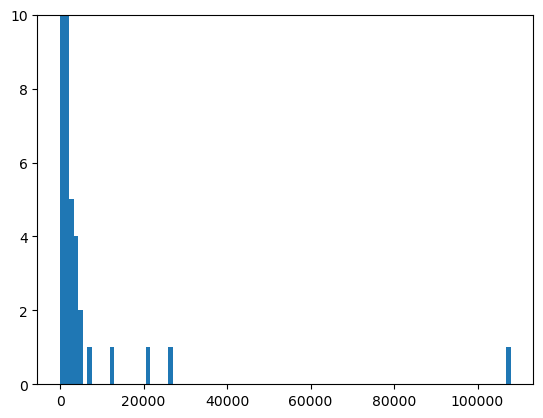

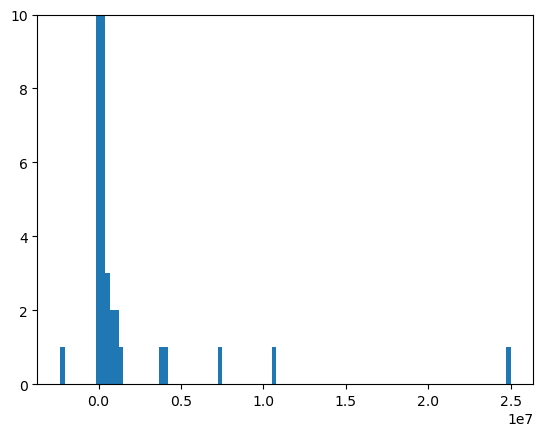

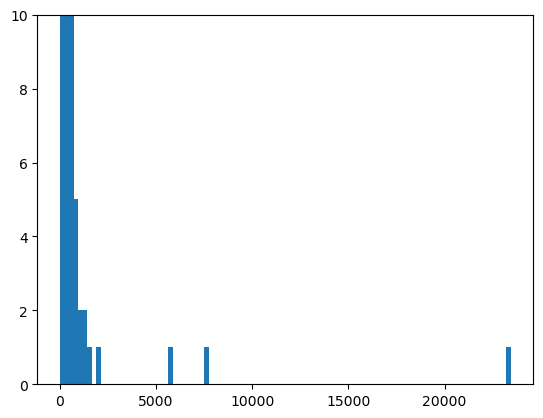

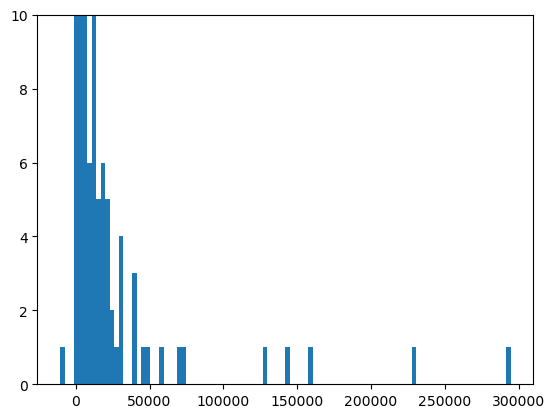

In [23]:
for i in missingData:
    
    plt.hist(data[i],bins=100)
    plt.ylim([0,10])
    plt.show()

In [24]:
for i in missingData:
    data[i].fillna(data[i].median(),inplace=True)
missingData = []
for i in data:
    if data[i].isnull().sum() > 0:
        print(i,':',data[i].isnull().sum(),'missing')
        print(i,':',data[i].isnull().sum() / len(data),'%')
        missingData.append(i)

In [25]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43405.000000,43405.00000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035162,0.59019,0.114446,6.300054,-3.845586e+02,-0.056097,0.093472,12.615721,2.651864,0.626846,...,-2.614272e+01,-0.010489,2.997018e+01,1.333074,4.263554e+02,17.008770,1.498141e+03,9.329937,71.507013,2.939753
std,2.993833,5.84221,5.438928,294.978147,6.118021e+04,7.200663,5.712548,505.346463,62.926210,14.669245,...,5.320062e+03,13.672969,5.329289e+03,122.094600,3.153369e+04,552.399416,1.390628e+05,123.985746,2347.090454,1.283975
min,-463.890000,-430.87000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003434,0.26901,0.021540,1.050800,-4.896200e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,9.461000e-03,0.014661,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800,2.000000
50%,0.049660,0.47190,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129560,0.68827,0.403260,2.783600,5.046100e+01,0.089441,0.150810,2.609200,2.062400,0.709090,...,1.287800e-01,0.284570,9.925800e-01,0.235870,1.921900e+01,10.378000,1.169800e+02,8.577500,9.559100,4.000000
max,94.280000,480.96000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


In [44]:
X = data.drop(columns='class')
y = data['class']
y = [int(item == b'1') for item in y]
print(y)
print(X.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
baseModel = RandomForestClassifier(n_estimators=10, n_jobs=-1)
cross_val_score(baseModel,X,y,scoring='accuracy')

array([0.95714779, 0.96244672, 0.95910609, 0.96175556, 0.96175556])

In [46]:
params = {'n_estimators':[10],
          'criterion':['gini','entropy'],
          'max_depth':[5,10,15,20,30,40],
          'min_samples_split':[16,12,10,8,6],
          'min_samples_leaf':[6,5,4,3,2],
          'max_features':[5,10,15,20,30,40]}
rfModel = RandomForestClassifier()
searchModel = RandomizedSearchCV(rfModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
searchModel.fit(X,y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, 40],
                                        'max_features': [5, 10, 15, 20, 30, 40],
                                        'min_samples_leaf': [6, 5, 4, 3, 2],
                                        'min_samples_split': [16, 12, 10, 8, 6],
                                        'n_estimators': [10]},
                   verbose=True)

In [47]:
searchModel.best_score_

0.9707176592558462